# Attrition Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

## Import data

[Dataset](https://www.kaggle.com/patelprashant/employee-attrition)

In [2]:
df = pd.read_csv('employee.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Anaylsis

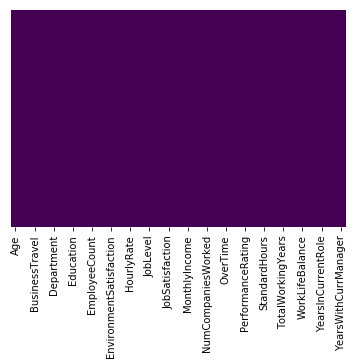

In [4]:
#checking to see if there are any missing data points. 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [5]:
df.shape

(1470, 35)

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#listing out the columns that are object types so we can do label encoding. 
list(df.loc[:, df.dtypes == object])

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [8]:
#create a MultiColumnLabelEncoder for categorical variables.

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [9]:
#print out the encoded items along with the shape. 
data = MultiColumnLabelEncoder(columns = ['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']).fit_transform(df)
data.shape



(1470, 35)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


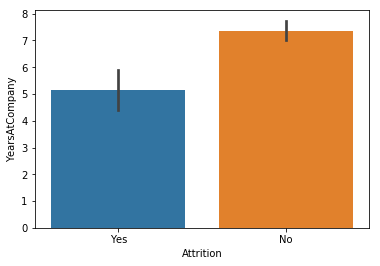

In [11]:
sns.barplot(x='Attrition', y='YearsAtCompany', data= df)
plt.show()


Those with attrition spent fewer years at the company.

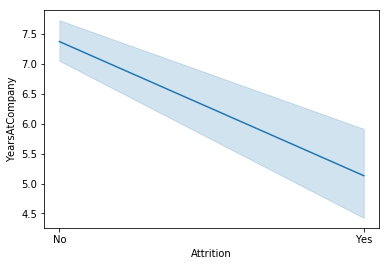

In [12]:
sns.lineplot(x='Attrition', y='YearsAtCompany', data= df)
plt.show()

Negative correlation between attrition and YearsAtCompany

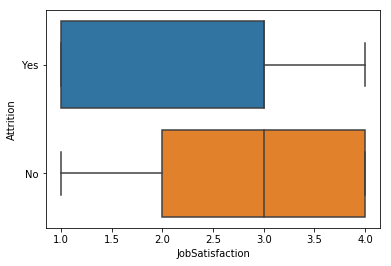

In [13]:

sns.boxplot(x='JobSatisfaction', y='Attrition', data=df)
plt.show()

Those with higher job satisfaction were less likely to contribute to attrition. 

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
df['JobRole'].head()

0          Sales Executive
1       Research Scientist
2    Laboratory Technician
3       Research Scientist
4    Laboratory Technician
Name: JobRole, dtype: object

In [16]:
list(df.loc[:, df.dtypes != object ])

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

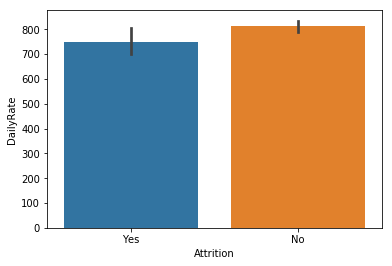

In [17]:
sns.barplot(x='Attrition', y='DailyRate', data = df)
plt.show()

Those who left (Attrition = yes) made less DailyRate than those who stayed. 

In [18]:
#I dropped these features because they all contain values of the same numbers; 
#these variables are not contributing impactful insights. 
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

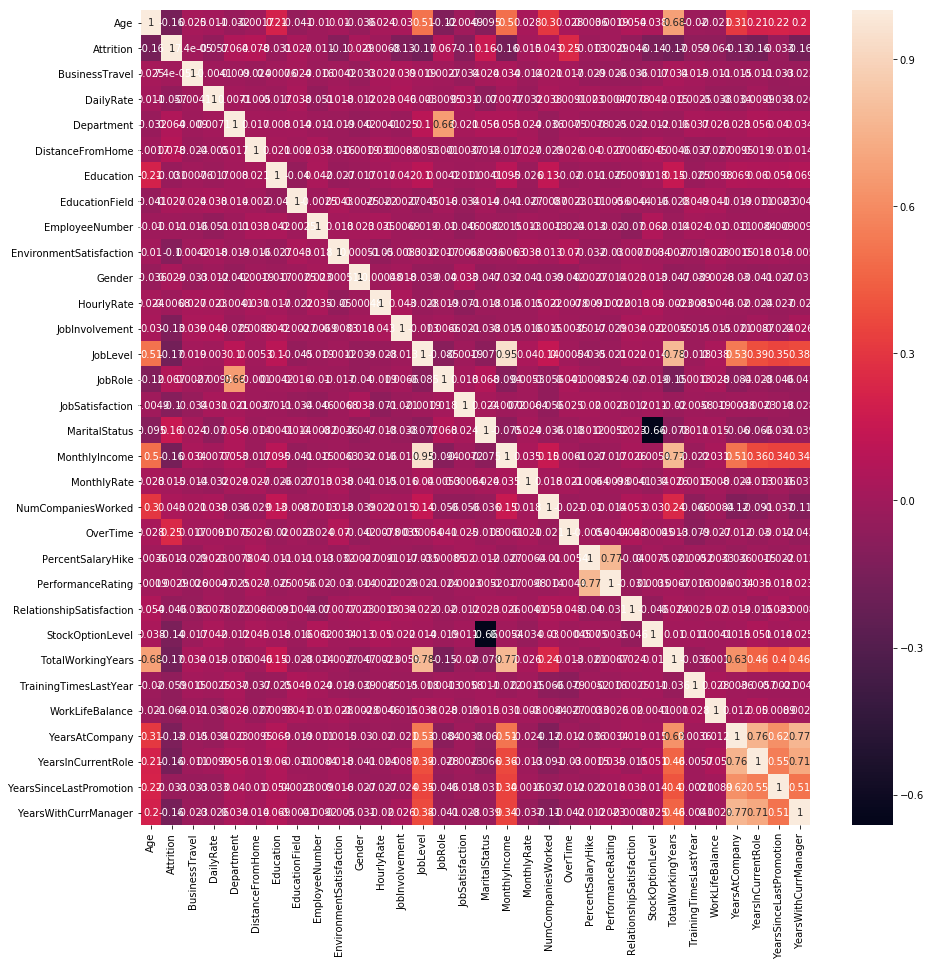

In [19]:
plt.figure(figsize=[15,15])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [20]:
#List the strength of correlation.
#Select 20 most correlated features, not counting 'Attrition'
data.corr()['Attrition'].sort_values(ascending=False)[1:21] 
 



OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
Name: Attrition, dtype: float64

In [21]:
# Find correlations with the Attrition 
most_correlated = data.corr().abs()['Attrition'].sort_values(ascending=False) 
# Maintain the top 25 most correlation features with Attrition 
most_correlated = most_correlated[1:26]      
mcr_features =  most_correlated.index

In [22]:
#list the top 25 correlated features. 
mcr_features

Index(['OverTime', 'TotalWorkingYears', 'JobLevel', 'MaritalStatus',
       'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'YearsWithCurrManager',
       'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement',
       'JobSatisfaction', 'EnvironmentSatisfaction', 'DistanceFromHome',
       'JobRole', 'Department', 'WorkLifeBalance', 'TrainingTimesLastYear',
       'DailyRate', 'RelationshipSatisfaction', 'NumCompaniesWorked',
       'YearsSinceLastPromotion', 'Education', 'Gender', 'EducationField'],
      dtype='object')

## Analysis 

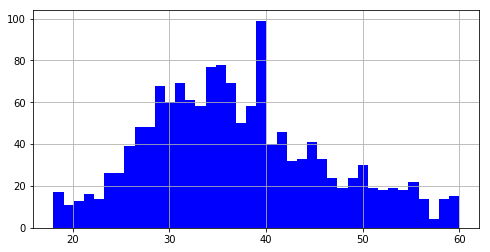

In [23]:
df['Age'].hist(color='blue', bins=40,figsize=(8,4))
#plt.show()

Age distribution of participants. Almost normal distribution. slight skew. 35 in middle. 

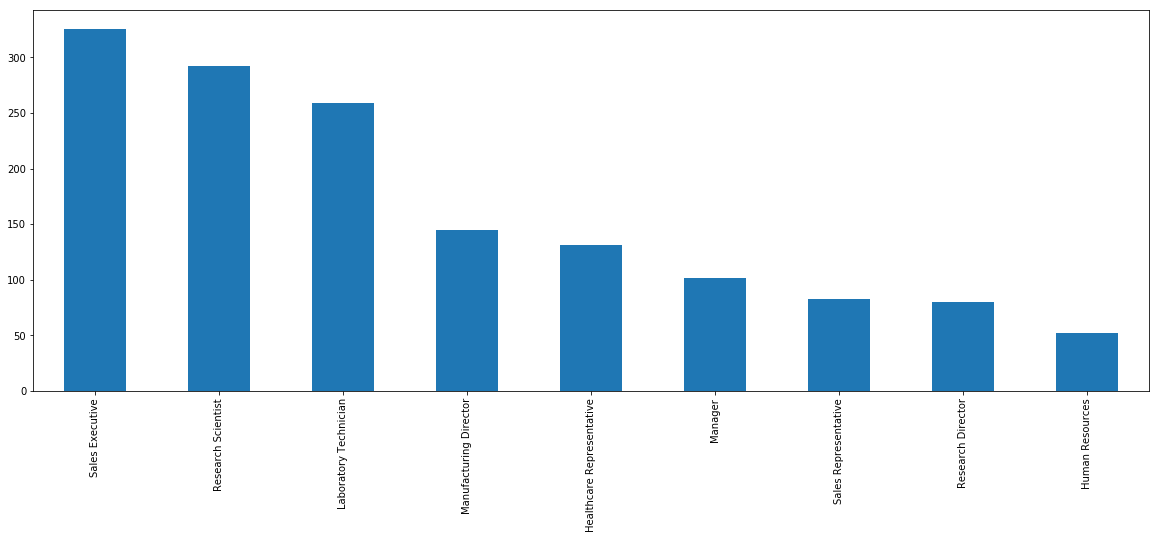

In [24]:
plt.figure(figsize=[20,7])

df['JobRole'].value_counts().plot(kind="bar")

plt.show()

The most popular job roles are Sales Exec, Research Scientist, and Laboratory Technician.  
The least are Human Resources, Resaerch Director, and Sales Representative.

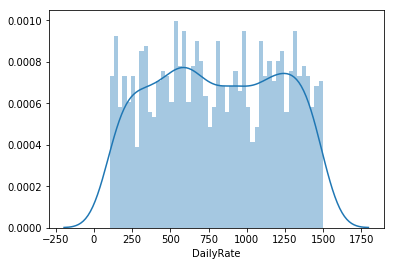

In [25]:
sns.distplot((data['DailyRate']),bins=50)
plt.show()

DailyRate has uniform distribution.

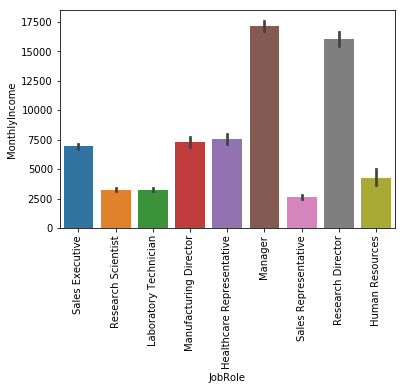

In [26]:
sns.barplot(x=df['JobRole'],  y = df['MonthlyIncome'])
plt.xticks(rotation=90)
plt.show()

Managers, Research Directors, and Manufacturing Directors make the most monthly income.  
Sales Representatives and Human Resources make the least.

In [27]:
X = data.drop('Attrition',axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Feature Selection

#### Most Correlated

In [28]:
X_trainMCR = X_train.loc[:,mcr_features]
X_testMCR = X_test.loc[:,mcr_features]
#only contains highly correlated features 
#run model with these features, compare 

#### Using Random Forest 

In [29]:
rfc = RandomForestClassifier(max_depth=100,max_features='auto', n_estimators=50, random_state=1)
rfc.fit(X_train, y_train) 
df_features = pd.DataFrame(rfc.feature_importances_)
df_features['features']= X_train.columns 
df_features.sort_values(0,ascending = False) 
rfc_features = list(df_features.sort_values(0,ascending = False)['features'][:25])
print('\nThe numbers of important features we will use are: ', len(rfc_features))
print('\nUsing Random Forest Classifier the 30 best features are: ')
print(rfc_features)


The numbers of important features we will use are:  25

Using Random Forest Classifier the 30 best features are: 
['MonthlyIncome', 'OverTime', 'Age', 'DailyRate', 'TotalWorkingYears', 'MonthlyRate', 'DistanceFromHome', 'EmployeeNumber', 'YearsAtCompany', 'HourlyRate', 'NumCompaniesWorked', 'YearsWithCurrManager', 'PercentSalaryHike', 'JobRole', 'StockOptionLevel', 'MaritalStatus', 'EnvironmentSatisfaction', 'YearsInCurrentRole', 'JobSatisfaction', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'WorkLifeBalance', 'JobInvolvement', 'EducationField', 'RelationshipSatisfaction']


In [30]:
X_trainRFC = X_train.loc[:,rfc_features]
X_testRFC = X_test.loc[:,rfc_features]

#### Using decision tree

In [31]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=10,  random_state=1)
dtree.fit(X_train,y_train)
df_features = pd.DataFrame(dtree.feature_importances_)
df_features['features']= X_train.columns 
df_features.sort_values(0,ascending = False) 
dtc_features = list(df_features.sort_values(0,ascending = False)['features'][:25])
print('\nThe numbers of important features we will use are: ', len(dtc_features))
print('\nUsing Random Forest Classifier the 30 best features are: ')
print(dtc_features)




The numbers of important features we will use are:  25

Using Random Forest Classifier the 30 best features are: 
['MonthlyIncome', 'OverTime', 'HourlyRate', 'DailyRate', 'MonthlyRate', 'NumCompaniesWorked', 'DistanceFromHome', 'Age', 'TotalWorkingYears', 'MaritalStatus', 'YearsInCurrentRole', 'JobSatisfaction', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'JobInvolvement', 'YearsAtCompany', 'RelationshipSatisfaction', 'Gender', 'EnvironmentSatisfaction', 'JobLevel', 'PercentSalaryHike', 'JobRole', 'WorkLifeBalance', 'StockOptionLevel', 'YearsWithCurrManager']


In [32]:
#I create new X_test and X_train comprised of the important features selected by the Decision Tree 
X_trainDTC = X_train.loc[:,dtc_features]
X_testDTC = X_test.loc[:,dtc_features]

## Training the decision tree

### All features 

In [33]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=10,  random_state=1)

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [35]:
#hyperparameter tuning and grid search (for random forest, for decision tree)

In [36]:
y_dtc = dtree.predict(X_test)

In [37]:
print(classification_report(y_test, y_dtc))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       255
           1       0.19      0.18      0.18        39

    accuracy                           0.79       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.79      0.79       294



In [38]:
print(confusion_matrix(y_test, y_dtc))

[[225  30]
 [ 32   7]]


In [39]:
#cross validation score
dtree_cv_score = cross_val_score(dtree, X, y, cv=10)
print (dtree_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", dtree_cv_score.mean())

[0.32432432 0.79054054 0.80405405 0.80272109 0.80952381 0.83673469
 0.78911565 0.82191781 0.84246575 0.79452055]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7615918266603198


In [40]:
print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0], (y_test != y_dtc).sum()))
cm = confusion_matrix(y_test, y_dtc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_dtc == True).sum()
p_neg = (y_dtc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 62


,Predict False,Predict True
Actual False,225,30
Actual True,32,7


False Positives (Type I error): 30 (11.8%)
False Negatives (Type II error): 32 (82.1%)


The false negatives, our target metric, is 82.1%

### Most correlated features 

This is a decision tree using the most correlated features, defined by the .corr function of correlation matrix.

In [41]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=10,  random_state=1)

In [42]:
dtree.fit(X_trainMCR,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [43]:
#hyperparameter tuning and grid search (for random forest, for decision tree)

In [44]:
y_dtc = dtree.predict(X_testMCR)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, y_dtc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       255
           1       0.27      0.23      0.25        39

    accuracy                           0.82       294
   macro avg       0.58      0.57      0.57       294
weighted avg       0.80      0.82      0.81       294



In [47]:
print(confusion_matrix(y_test, y_dtc))

[[231  24]
 [ 30   9]]


In [48]:
#cross validation score
dtree_cv_score = cross_val_score(dtree, X, y, cv=10)
print (dtree_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Decision Tree: ", dtree_cv_score.mean())

[0.32432432 0.79054054 0.80405405 0.80272109 0.80952381 0.83673469
 0.78911565 0.82191781 0.84246575 0.79452055]
=== Mean AUC Score ===
Mean AUC Score - Decision Tree:  0.7615918266603198


In [49]:
print("Number of mislabeled points out of a total {} points : {}".format(X_testMCR.shape[0], (y_test != y_dtc).sum()))
cm = confusion_matrix(y_test, y_dtc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_dtc == True).sum()
p_neg = (y_dtc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 54


,Predict False,Predict True
Actual False,231,24
Actual True,30,9


False Positives (Type I error): 24 (9.4%)
False Negatives (Type II error): 30 (76.9%)


Using "most correlated feature" variables resulted in a lower Type II error than using all features (76.9%)

### Random Forest Features

In [50]:
#X_trainRFC = X_train.loc[:,rfc_features]
#X_testRFC = X_test.loc[:,rfc_features]

In [51]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=10,  random_state=1)

In [52]:
dtree.fit(X_trainRFC,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [53]:
#hyperparameter tuning and grid search (for random forest, for decision tree)

In [54]:
y_dtc = dtree.predict(X_testRFC)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, y_dtc))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       255
           1       0.12      0.10      0.11        39

    accuracy                           0.78       294
   macro avg       0.49      0.49      0.49       294
weighted avg       0.77      0.78      0.77       294



In [57]:
print(confusion_matrix(y_test, y_dtc))

[[225  30]
 [ 35   4]]


In [58]:
#cross validation score
dtree_cv_score = cross_val_score(dtree, X, y, cv=10)
print (dtree_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", dtree_cv_score.mean())

[0.32432432 0.79054054 0.80405405 0.80272109 0.80952381 0.83673469
 0.78911565 0.82191781 0.84246575 0.79452055]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7615918266603198


In [59]:
print("Number of mislabeled points out of a total {} points : {}".format(X_testRFC.shape[0], (y_test != y_dtc).sum()))
cm = confusion_matrix(y_test, y_dtc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_dtc == True).sum()
p_neg = (y_dtc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 65


,Predict False,Predict True
Actual False,225,30
Actual True,35,4


False Positives (Type I error): 30 (11.8%)
False Negatives (Type II error): 35 (89.7%)


The type 2 error using these variables is higher than using MCR variables.

### Decision Tree Features 

In [60]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=10,  random_state=1)

In [61]:
dtree.fit(X_trainDTC,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [62]:
#hyperparameter tuning and grid search (for random forest, for decision tree)

In [63]:
y_dtc = dtree.predict(X_testDTC)

In [64]:
print(classification_report(y_test, y_dtc))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       255
           1       0.21      0.18      0.19        39

    accuracy                           0.80       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.80      0.79       294



In [65]:
print(confusion_matrix(y_test, y_dtc))

[[228  27]
 [ 32   7]]


In [66]:
#cross validation score
dtree_cv_score = cross_val_score(dtree, X, y, cv=10)
print (dtree_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", dtree_cv_score.mean())

[0.32432432 0.79054054 0.80405405 0.80272109 0.80952381 0.83673469
 0.78911565 0.82191781 0.84246575 0.79452055]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7615918266603198


In [67]:
print("Number of mislabeled points out of a total {} points : {}".format(X_testDTC.shape[0], (y_test != y_dtc).sum()))
cm = confusion_matrix(y_test, y_dtc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_dtc == True).sum()
p_neg = (y_dtc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 59


,Predict False,Predict True
Actual False,228,27
Actual True,32,7


False Positives (Type I error): 27 (10.6%)
False Negatives (Type II error): 32 (82.1%)


These variables resulted in a lower Type 2 error compared to using Random Forest Features. 
Decision tree with "Most Correlated Features" resulted in lowest Type 2 error. 

## Training the Random Forest model

### All features

In [68]:
rfc = RandomForestClassifier(max_depth=100,max_features='auto', n_estimators=50, random_state=1)

In [69]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [70]:
y_rfc = rfc.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



In [73]:
print(confusion_matrix(y_test, y_rfc))

[[253   2]
 [ 35   4]]


In [74]:
#cross validation score
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print (rfc_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

[0.81014785 0.7827621  0.7906586  0.73424797 0.87364499 0.77134146
 0.75846883 0.7242842  0.80311064 0.81831036]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7866976996602014


In [75]:
print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0], (y_test != y_rfc).sum()))
cm = confusion_matrix(y_test, y_rfc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_rfc == True).sum()
p_neg = (y_rfc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 37


,Predict False,Predict True
Actual False,253,2
Actual True,35,4


False Positives (Type I error): 2 (0.8%)
False Negatives (Type II error): 35 (89.7%)


### Most correlated features

In [76]:
rfc = RandomForestClassifier(max_depth=100,max_features='auto', n_estimators=50, random_state=1)

In [77]:
rfc.fit(X_trainMCR, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [78]:
y_rfc = rfc.predict(X_testMCR)

In [79]:
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.56      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.72      0.56      0.57       294
weighted avg       0.84      0.87      0.83       294



In [80]:
print(confusion_matrix(y_test, y_rfc))

[[251   4]
 [ 34   5]]


In [81]:
#cross validation score
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print (rfc_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

[0.81014785 0.7827621  0.7906586  0.73424797 0.87364499 0.77134146
 0.75846883 0.7242842  0.80311064 0.81831036]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7866976996602014


In [82]:
print("Number of mislabeled points out of a total {} points : {}".format(X_testMCR.shape[0], (y_test != y_rfc).sum()))
cm = confusion_matrix(y_test, y_rfc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_rfc == True).sum()
p_neg = (y_rfc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 38


,Predict False,Predict True
Actual False,251,4
Actual True,34,5


False Positives (Type I error): 4 (1.6%)
False Negatives (Type II error): 34 (87.2%)


The Type 2 error <Type 2 error for "All Features". 

### Random Forest Features

In [83]:
rfc = RandomForestClassifier(max_depth=100,max_features='auto', n_estimators=50, random_state=1)

In [84]:
rfc.fit(X_trainRFC, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [85]:
y_rfc = rfc.predict(X_testRFC)

In [86]:
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [87]:
print(confusion_matrix(y_test, y_rfc))

[[254   1]
 [ 36   3]]


In [88]:
#cross validation score
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print (rfc_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

[0.81014785 0.7827621  0.7906586  0.73424797 0.87364499 0.77134146
 0.75846883 0.7242842  0.80311064 0.81831036]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7866976996602014


In [89]:
print("Number of mislabeled points out of a total {} points : {}".format(X_testRFC.shape[0], (y_test != y_rfc).sum()))
cm = confusion_matrix(y_test, y_rfc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_rfc == True).sum()
p_neg = (y_rfc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 37


,Predict False,Predict True
Actual False,254,1
Actual True,36,3


False Positives (Type I error): 1 (0.4%)
False Negatives (Type II error): 36 (92.3%)


Type 2 error is greater than that of Most Correlated Features.

### Decision Tree Features 

In [90]:
rfc = RandomForestClassifier(max_depth=100,max_features='auto', n_estimators=50, random_state=1)

In [91]:
rfc.fit(X_trainDTC, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [92]:
y_rfc = rfc.predict(X_testDTC)

In [93]:
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [94]:
print(confusion_matrix(y_test, y_rfc))

[[254   1]
 [ 35   4]]


In [95]:
#cross validation score
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print (rfc_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

[0.81014785 0.7827621  0.7906586  0.73424797 0.87364499 0.77134146
 0.75846883 0.7242842  0.80311064 0.81831036]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7866976996602014


In [96]:
print("Number of mislabeled points out of a total {} points : {}".format(X_testDTC.shape[0], (y_test != y_rfc).sum()))
cm = confusion_matrix(y_test, y_rfc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_rfc == True).sum()
p_neg = (y_rfc)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 36


,Predict False,Predict True
Actual False,254,1
Actual True,35,4


False Positives (Type I error): 1 (0.4%)
False Negatives (Type II error): 35 (89.7%)


Type 2 error for this is less than that of Random Forest Features.

### Conclusion

Random forest with MCR had the smallest Type II error(87.2).  

Decision tree with Most Correlated features (MCR) had the smallest Type II error (76.9).  



## Hyperparameter Tuning 

### Random Forest

#We're going to change our hyperparameters to see if we get better results

In [98]:
#We are tuning using the Most Correlated features. 
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_trainMCR, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [109]:
rfc2 = RandomForestClassifier(max_depth=140,max_features='auto', n_estimators=1000, random_state=1)

In [110]:
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=140, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [111]:
y_rfc2 = rfc2.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
print(classification_report(y_test, y_rfc2))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



In [114]:
print(confusion_matrix(y_test, y_rfc2))

[[253   2]
 [ 35   4]]


In [115]:
print("Number of mislabeled points out of a total {} points : {}".format(X_testRFC.shape[0], (y_test != y_rfc2).sum()))
cm = confusion_matrix(y_test, y_rfc)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_rfc2 == True).sum()
p_neg = (y_rfc2)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 37


,Predict False,Predict True
Actual False,254,1
Actual True,35,4


False Positives (Type I error): 1 (0.4%)
False Negatives (Type II error): 35 (89.7%)


When hypertuning, false negative is now 89.7  
Hypertuning decreased false  negatives (went from 92.3% to 89.7%)

In [116]:
#cross validation score
from sklearn.model_selection import cross_val_score
rfc_cv_score2 = cross_val_score(rfc2, X, y, cv=10, scoring='roc_auc')
print (rfc_cv_score2)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score2.mean())

[0.83585349 0.82090054 0.82274866 0.7347561  0.88431572 0.77320461
 0.77591463 0.76246023 0.86390951 0.80823613]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8082299612880419


The Mean AUC score jumped from .79 to .81

### Decision Tree


In [106]:
#We will hypertune the decision tree using the "Most Correlated" features. 

In [99]:

## How to optimize hyper-parameters of a DecisionTree model using Grid Search in Python
def Snippet_146():
    print()
    print(format('How to optimize hyper-parameters of a DT model using Grid Search in Python','*^82'))

    import warnings
    warnings.filterwarnings("ignore")

    # load libraries
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV, cross_val_score
    from sklearn.preprocessing import StandardScaler

    # Load the data
    X = X_test
    y = y_test
    rfc.fit(X_trainMCR, y_train)
    # Create an scaler object
    sc = StandardScaler()

    # Create a pca object
    pca = decomposition.PCA()

    # Create a logistic regression object with an L2 penalty
    decisiontree = tree.DecisionTreeClassifier()

    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a Decision Tree Classifier on the data.
    pipe = Pipeline(steps=[('sc', sc),
                           ('pca', pca),
                           ('decisiontree', decisiontree)])

    # Create Parameter Space
    # Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
    n_components = list(range(1,X.shape[1]+1,1))

    # Create lists of parameter for Decision Tree Classifier
    criterion = ['gini', 'entropy']
    max_depth = [4,6,8,12]

    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
    parameters = dict(pca__n_components=n_components,
                      decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

    # Conduct Parameter Optmization With Pipeline
    # Create a grid search object
    clf = GridSearchCV(pipe, parameters)

    # Fit the grid search
    clf.fit(X, y)

    # View The Best Parameters
    print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
    print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
    print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf.best_estimator_.get_params()['decisiontree'])

    # Use Cross Validation To Evaluate Model
    CV_Result = cross_val_score(clf, X, y, cv=4, n_jobs=-1)
    print(); print(CV_Result)
    print(); print(CV_Result.mean())
    print(); print(CV_Result.std())

Snippet_146()


****How to optimize hyper-parameters of a DT model using Grid Search in Python****
Best Criterion: entropy
Best max_depth: 4
Best Number Of Components: 2

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[0.85135135 0.7972973  0.83783784 0.86111111]

0.8368993993993994

0.024311895528941325


In [123]:
dtree2 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [124]:
dtree2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [125]:
y_dtc2 = dtree2.predict(X_test)

In [126]:
print(classification_report(y_test, y_dtc2))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.20      0.05      0.08        39

    accuracy                           0.85       294
   macro avg       0.53      0.51      0.50       294
weighted avg       0.78      0.85      0.81       294



In [127]:
print(confusion_matrix(y_test, y_dtc2))

[[247   8]
 [ 37   2]]


In [128]:
#cross validation score
dtree_cv_score = cross_val_score(dtree2, X, y, cv=10)
print (dtree_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", dtree_cv_score.mean())

[0.81081081 0.82432432 0.83783784 0.83673469 0.82993197 0.82993197
 0.82993197 0.83561644 0.8630137  0.83561644]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8333750160560337


In [129]:
print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0], (y_test != y_dtc2).sum()))
cm = confusion_matrix(y_test, y_dtc2)
df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True'])
display(df_cm)
t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0]
f_pos = df_cm.iloc[0,1]
f_neg = df_cm.iloc[1,0]
a_pos = (y_test == True).sum()
a_neg = (y_test == False).sum()
p_pos = (y_dtc2 == True).sum()
p_neg = (y_dtc2)


print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

Number of mislabeled points out of a total 294 points : 45


,Predict False,Predict True
Actual False,247,8
Actual True,37,2


False Positives (Type I error): 8 (3.1%)
False Negatives (Type II error): 37 (94.9%)


When hyptertuning, Random Forest gives smaller Type 2 error. More work should be done to uncover why hypertuning increased Decision Tree's Type 2 error. 